<a href="https://colab.research.google.com/github/TeamHub2/Deep-Learning/blob/main/Potato_diseases_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep learning/Poteto',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2156 files belonging to 3 classes.


In [ ]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:

for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 0 1 0 2 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 2 0 0 0 0 1]


In [ ]:

for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[111. 106. 113.]
  [113. 108. 115.]
  [116. 111. 118.]
  ...
  [108. 102. 106.]
  [123. 117. 121.]
  [ 84.  78.  82.]]

 [[115. 110. 117.]
  [116. 111. 118.]
  [118. 113. 120.]
  ...
  [ 88.  82.  86.]
  [105.  99. 103.]
  [109. 103. 107.]]

 [[116. 111. 118.]
  [116. 111. 118.]
  [116. 111. 118.]
  ...
  [ 97.  91.  95.]
  [104.  98. 102.]
  [105.  99. 103.]]

 ...

 [[153. 147. 149.]
  [155. 149. 151.]
  [157. 151. 153.]
  ...
  [132. 124. 121.]
  [132. 124. 121.]
  [134. 126. 123.]]

 [[157. 151. 153.]
  [156. 150. 152.]
  [154. 148. 150.]
  ...
  [129. 121. 118.]
  [124. 116. 113.]
  [122. 114. 111.]]

 [[153. 147. 149.]
  [150. 144. 146.]
  [147. 141. 143.]
  ...
  [141. 133. 130.]
  [131. 123. 120.]
  [123. 115. 112.]]]


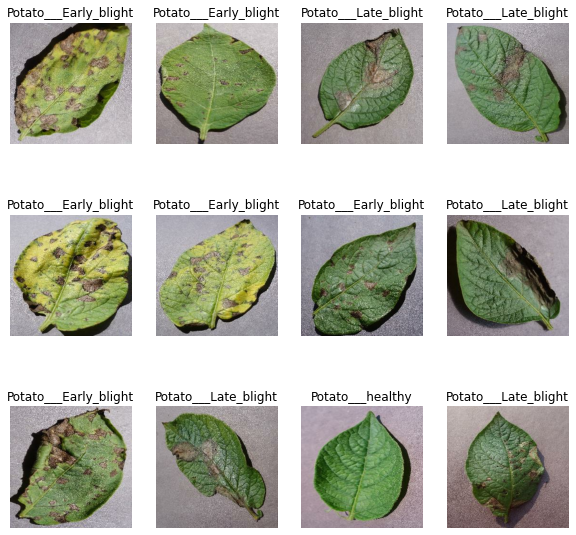

In [ ]:

plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name[labels_batch[i]])
    plt.axis("off")
    
 

In [ ]:
len(dataset)

68

In [ ]:

train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:

test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)


6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 259s 214ms/step - loss: 0.8792 - accuracy: 0.5110 - val_loss: 0.8074 - val_accuracy: 0.5938
Epoch 2/50
54/54 [==============================] - 6s 113ms/step - loss: 0.5450 - accuracy: 0.7378 - val_loss: 0.3732 - val_accuracy: 0.8646
Epoch 3/50
54/54 [==============================] - 6s 112ms/step - loss: 0.3683 - accuracy: 0.8443 - val_loss: 0.3714 - val_accuracy: 0.8542
Epoch 4/50
54/54 [==============================] - 6s 113ms/step - loss: 0.2478 - accuracy: 0.8976 - val_loss: 0.2957 - val_accuracy: 0.9062
Epoch 5/50
54/54 [==============================] - 6s 112ms/step - loss: 0.2365 - accuracy: 0.9126 - val_loss: 0.1107 - val_accuracy: 0.9479
Epoch 6/50
54/54 [==============================] - 6s 112ms/step - loss: 0.0914 - accuracy: 0.9635 - val_loss: 0.0592 - val_accuracy: 0.9688
Epoch 7/50
54/54 [==============================] - 6s 113ms/step - loss: 0.1194 - accuracy: 0.9508 - val_loss: 0.0412 - val_accuracy: 0.9896
Epoc

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 38ms/step - loss: 0.0011 - accuracy: 1.0000


In [ ]:
history

In [ ]:

history.params

{'epochs': 50, 'steps': 54, 'verbose': 1}

In [ ]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:

len(history.history['loss'])

50

In [ ]:
history.history['loss'][:5]

[0.8792473077774048,
 0.5449910163879395,
 0.3682529330253601,
 0.24783989787101746,
 0.23648959398269653]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

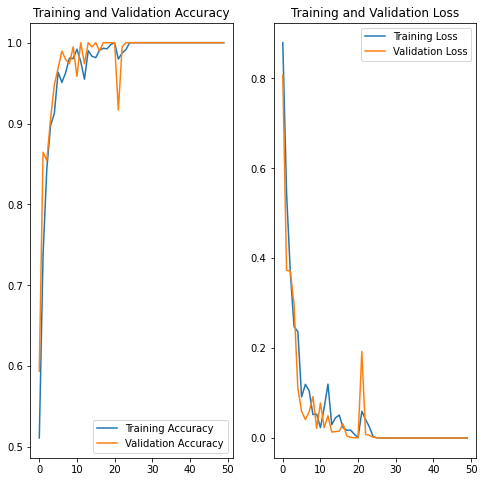

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


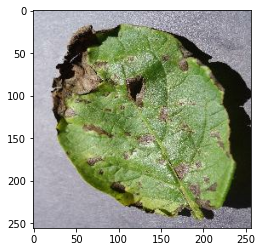

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

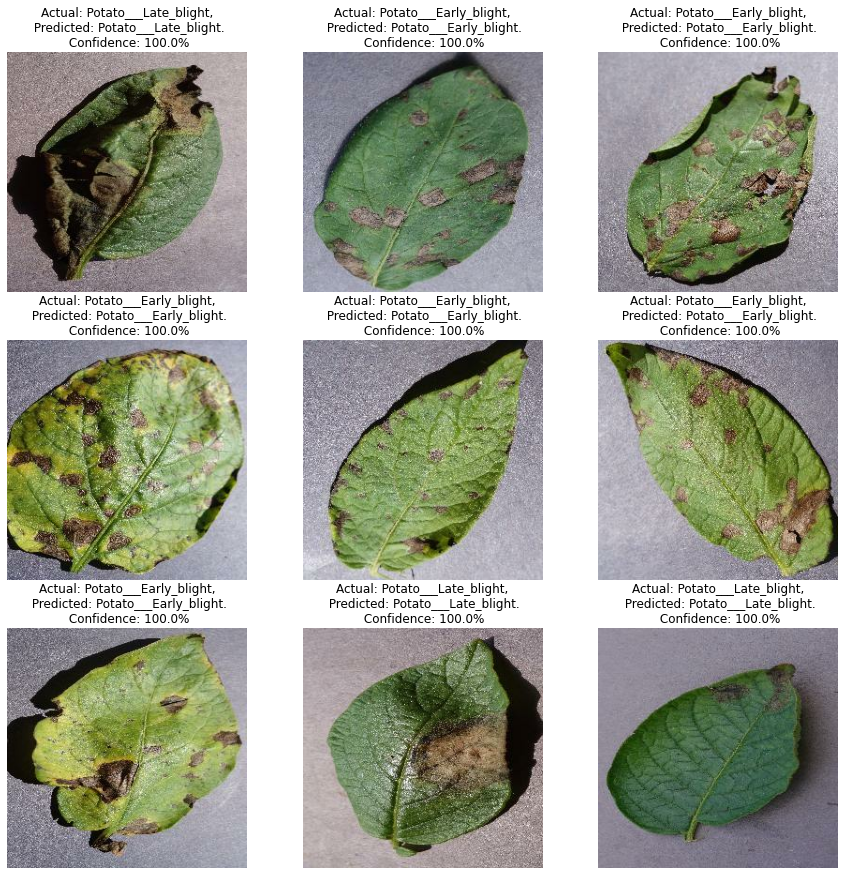

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("/content/drive/MyDrive/Deep learning/File") + [0]])+1
model.save(f"/content/drive/MyDrive/Deep learning/File{model_version}")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Deep learning/File1/assets


In [ ]:
model.save("/content/drive/MyDrive/Deep learning/File/potatoes.h5")